In [140]:
import sqlite3 # importing the sqlite3 library
import time # to create the unix time stamp (in Col 1)
import datetime # to create the data stampe (in Col 2)
import random # to create the random values (in Col 4)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
conn = sqlite3.connect('example.db')# connecting with the database. If the db file exists connection occurs. If not the db file is created.
c = conn.cursor() # defining the cursor.


##### sqlite3 is already preinstalled in python 3 and above versions. All 3 steps above are required - import sqlite3, define connection to the database file and define the cursor to execute the commands.

In [141]:
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS test(unix REAL, datestamp TEXT, keyword TEXT, value REAL)') # Creating a table called example

### Entering data dynamically using variables and 'for' loops in sqlite3

In [142]:
def dynamic_data_entry():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = 'Python'
    value = random.randrange(0,10)
    c.execute("INSERT INTO test(unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
              (unix, date, keyword, value))
    conn.commit()
create_table()# Since new new table called test is being defined in this code (within the example.db), executetable creation.
for i in range(10):
    dynamic_data_entry()
    time.sleep(1)


### Notes
def dynamic_data_entry(): # for automatic data entry using variables
    unix = time.time() # unix is the 1st variable. It is defined using the time library
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    # date is the 2nd variable. It is defined to consist of Year-month-date Hour:Minute:Seconds. 
    # The Year-month-date are string versions of datetime library. 
    # The Hour:Minute:Seconds are string format of time "strftime" from timestamp varialbe unix    
    # %Y-%m-%d %H:%M:%S defines the format in which the variable needs date stamp to be inserted.
    
    keyword = 'Python' # keyword is the 3rd variable. We can use anything. Here it is a constant Python.
    value = random.randrange(0,10) # value is the 4th variable. Here value is defined from the library random. 
    # The variable value can get any randon number in the range 0-10.
    c.execute("INSERT INTO test(unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
              (unix, date, keyword, value))
    # Here we insert the values in to the columns in the table "test" and execute the cursor
    # INSERT INTO test(unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)- command says that the data is being inserted to the the 4 columns of the table test with values to be defined
    # (unix, date, keyword, value) - is used to call the 4 variables for execution which were defined earlier using dynamic data entry().
    conn.commit() # after insertion of data, save or commit
     # If we need multiple data to be entered in to the table we need some kind of loop to execute the code above multiple times.
    # We can use 'for loop' to execute the above code say 5 times. This will define variables 5 times and input data in 5 rows.
    for i in range(10):
        dynamic_data_entry()
        time.sleep(1) # to get 1 second increment for time stamps
        # Notes on issues: It was not possible to access the database (example.db) by creating a new Jupyter Notebook. The DB was locked out. This is because sqlite only allows one user to access the db for each instance.
        # By copying a file and renaming / editing it to change he code, I was able to access the same database while the other Jupyter notebook was still open. Not sure why that is the case.
        # There was an error - "table not found". This was becasue when a bnew table is defined in the database, it is important to not forget to execute the create_table() code to actually create the table.
        

##### All entered data needs to be saved using conn.cmmit()

#### The create_table() need not be executed again. If exected again it will not throw an error becasue of the code CREATE TABLE IF NOT EXISTS.
#### The data_entry() command will execute the insertion of data. Everytime the code is run, this command will execute and will add another row with the data.

In [143]:
def read_from_db():
    c.execute('SELECT datestamp, keyword, value FROM test WHERE value < 8 AND value > 3') # Reading from the db file. By using * all columns are being called.
    for row in c.fetchall():
        print(row)

#### Other options
#c.execute("SELECT datestamp, keyword, value FROM test WHERE value < 8") is used to print selected columns in needed order
#c.execute("SELECT * FROM test WHERE value < 8") can be used to print all columns
#c.execute("SELECT datestamp, keyword, value FROM test WHERE value < 8 AND value > 3") is used to query with multiple logic
#data = c.fetchall()    
#print(data) # Together these 2 are used to print everything without iterating the rows and get unorganized data.
#print(row)# All rows will be printed. Indexing can be used here to specify the rows to print.
#print(row[0])#Indexing used here to print rows with INdex = 0 (for first row of each record).

#### Using read_from_db() command to read from the database created.
#### Remember to read from the db file before closing the cursor and connection.
#### Alternatively the example.db file can be accessed by downloading the sqlite browser available on github. The latest version is 3.10. By opeining the DB Browser we can open the db file "example.db". In my windows PC the db file is stored at: c:\Users\\Veeru\example.db

In [144]:
def graph_data():
    c.execute('SELECT unix, value FROM test')
    dates=[]
    values=[]
    for row in c.fetchall():
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
    plt.plot_date(dates, values, '-')
    plt.show()        
        

#Notes
#def graph_data():
    #c.execute('SELECT unix, value FROM test')
    #dates[]# first variable to be printed. The List will start out empty but we will append data in next steps
    #values=[]# second variable to be printed. The List will start out empty but we will append data in next steps
    #for row in c.fetchall():
        #dates.append(datetime.datetime.fromtimestamp(row[0]))
        # We need a date-time object. Ensuring row[0] i.e unix is date-time object
        #basically row[0] is appended to the list dates, after ensureing that it is a date-time object.
        #values.append(row[1])# in c.execute() above, unix is row[0] and value is row[1]
    #plt.plot_date(dates, values, '-') # '-' means line graph. Without this we get a scatter graph.
    #plt.show()  

#### Ensure that the graph_data() function defined above is called at the end to actuall print the graph.

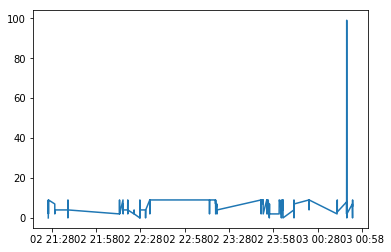

In [145]:
graph_data()

#### Reading the table

In [146]:
read_from_db()# Executing the read_from_db command, which includes print(data).

('2018-12-02 21:29:54', 'Python', 7.0)
('2018-12-02 21:29:57', 'Python', 7.0)
('2018-12-02 21:30:00', 'Python', 4.0)
('2018-12-02 21:38:48', 'Python', 4.0)
('2018-12-02 21:38:49', 'Python', 7.0)
('2018-12-02 21:38:54', 'Python', 4.0)
('2018-12-02 22:13:49', 'Python', 4.0)
('2018-12-02 22:16:10', 'Python', 4.0)
('2018-12-02 22:16:14', 'Python', 7.0)
('2018-12-02 22:16:17', 'Python', 4.0)
('2018-12-02 22:16:19', 'Python', 4.0)
('2018-12-02 22:19:18', 'Python', 4.0)
('2018-12-02 22:19:25', 'Python', 4.0)
('2018-12-02 22:23:40', 'Python', 4.0)
('2018-12-02 22:27:34', 'Python', 4.0)
('2018-12-02 22:27:42', 'Python', 4.0)
('2018-12-02 22:31:21', 'Python', 4.0)
('2018-12-02 22:31:23', 'Python', 4.0)
('2018-12-02 22:31:25', 'Python', 4.0)
('2018-12-02 22:31:31', 'Python', 4.0)
('2018-12-02 22:34:27', 'Python', 4.0)
('2018-12-02 23:18:46', 'Python', 7.0)
('2018-12-02 23:18:47', 'Python', 7.0)
('2018-12-02 23:18:49', 'Python', 7.0)
('2018-12-02 23:19:43', 'Python', 7.0)
('2018-12-02 23:19:47', '

#### At the end of sqlite code, it is necessary to close the cursor to stop the database from using any memory by using c.close() and close the connection with conn.close()

Eventhough the re-execution of create_table()  code didnt result in an error, it ended up adding more rows to the table with same inputs, everytime the code is run again. This is because of re-execution of the data_entry() command. 

### Updating Existing table 'test' - replacing all values 1 with 99

In [147]:
def del_and_update():
    c.execute('SELECT * FROM test')
    [print(row) for row in c.fetchall()]
    
    c.execute('UPDATE test SET value = 99 WHERE value = 1')
    conn.commit()
   
    print(50*'#')
    
    c.execute('SELECT * FROM test')
    [print(row) for row in c.fetchall()]
    
del_and_update()


(1543803934.0653296, '2018-12-02 21:25:34', 'Python', 0.0)
(1543803937.4558532, '2018-12-02 21:25:37', 'Python', 9.0)
(1543803940.799579, '2018-12-02 21:25:40', 'Python', 2.0)
(1543803941.9245799, '2018-12-02 21:25:41', 'Python', 9.0)
(1543804194.075718, '2018-12-02 21:29:54', 'Python', 7.0)
(1543804197.4282367, '2018-12-02 21:29:57', 'Python', 7.0)
(1543804198.5686882, '2018-12-02 21:29:58', 'Python', 2.0)
(1543804200.8187594, '2018-12-02 21:30:00', 'Python', 4.0)
(1543804728.4733224, '2018-12-02 21:38:48', 'Python', 4.0)
(1543804729.706774, '2018-12-02 21:38:49', 'Python', 7.0)
(1543804731.1597521, '2018-12-02 21:38:51', 'Python', 0.0)
(1543804732.253516, '2018-12-02 21:38:52', 'Python', 9.0)
(1543804734.5191052, '2018-12-02 21:38:54', 'Python', 4.0)
(1543806826.0569582, '2018-12-02 22:13:46', 'Python', 2.0)
(1543806827.2444544, '2018-12-02 22:13:47', 'Python', 9.0)
(1543806828.385145, '2018-12-02 22:13:48', 'Python', 9.0)
(1543806829.541488, '2018-12-02 22:13:49', 'Python', 4.0)
(15

#Notes on updating tables:
#def del_and_update():# del_and_update() function is used to delete or update an existing table
    #c.execute('SELECT * FROM test') # cursor executes to select all data in the table "test". Selecting doesn't do any change.
    #[print(row) for row in c.fetchall()] # singleine "for loop" to iterate each row in the existing table and print them.
    # The reason to use for loop is to make the changes / updates to each row iteratively.
   
    #c.execute('UPDATE test SET value = 99 WHERE value = 1') # logic to update all values = 1 with 99.
    #conn.commit() # all changes made need to be saved to take effect.
    
    #c.execute('SELECT * FROM test') # cursor executes to select all data in the table "test", after updates are saved.
    #[print(row) for row in c.fetchall()] # singleine "for loop" to iterate each row in the updated table and print them.

### Determining the number of records that match a criteria that need to be deleted (Ex: value=5)

In [148]:
c.execute('SELECT * FROM test WHERE value = 5')
[print(row) for row in c.fetchall()]
print(50*'#')

c.execute('SELECT * FROM test WHERE value = 5')
print(len(c.fetchall()))


(1543816291.7254066, '2018-12-03 00:51:31', 'Python', 5.0)
##################################################
1


#This should be the first step to determine the number of records that are equal to 5 and will be deleted
#print(len(c.fetchall()))- is used to determine the length or count.

### Existing table 'test' - deleting all values 5

In [149]:
c.execute('DELETE FROM test WHERE value = 5')
conn.commit()

print(50*'#')

c.execute('SELECT * FROM test')
[print(row) for row in c.fetchall()]

##################################################
(1543803934.0653296, '2018-12-02 21:25:34', 'Python', 0.0)
(1543803937.4558532, '2018-12-02 21:25:37', 'Python', 9.0)
(1543803940.799579, '2018-12-02 21:25:40', 'Python', 2.0)
(1543803941.9245799, '2018-12-02 21:25:41', 'Python', 9.0)
(1543804194.075718, '2018-12-02 21:29:54', 'Python', 7.0)
(1543804197.4282367, '2018-12-02 21:29:57', 'Python', 7.0)
(1543804198.5686882, '2018-12-02 21:29:58', 'Python', 2.0)
(1543804200.8187594, '2018-12-02 21:30:00', 'Python', 4.0)
(1543804728.4733224, '2018-12-02 21:38:48', 'Python', 4.0)
(1543804729.706774, '2018-12-02 21:38:49', 'Python', 7.0)
(1543804731.1597521, '2018-12-02 21:38:51', 'Python', 0.0)
(1543804732.253516, '2018-12-02 21:38:52', 'Python', 9.0)
(1543804734.5191052, '2018-12-02 21:38:54', 'Python', 4.0)
(1543806826.0569582, '2018-12-02 22:13:46', 'Python', 2.0)
(1543806827.2444544, '2018-12-02 22:13:47', 'Python', 9.0)
(1543806828.385145, '2018-12-02 22:13:48', 'Python', 9.0)
(154380682

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#c.execute('DELETE FROM test WHERE value = 5')# cursor executes to delete all data with value=5 in the table "test". 
#conn.commit() # all changes made need to be saved to take effect.

#print(50*'#')# Printign 50 # to separate the two tables printed

#c.execute('SELECT * FROM test') # cursor executes to select all data in the table "test". Selecting doesn't do any change.
#[print(row) for row in c.fetchall()] # singleine "for loop" to iterate each row in the updated table and print them.

In [150]:
c.close() # Cursor needs to be closed at the end of the code batch
conn.close() # Connection needs to be closed at the end of the code batch